AI vs ML vs DL

DL/Neural Network: Architecture: input layer, hidden layers, output layer

Nodes in input layer? no. of inputs
Nodes in output layer? no. of labels to be predicted
Nodes in hidden layer? assumption
32, 64, 128....
16, 32, 64, 128....

Working of human brain.

Neural Network is made up of two different processes:
1. Forward propagation/pass
2. backward propagation/pass

1 round of training = 1 FP + 1 BP

BP???

Image Classification model using neural networks

Two Libraries:

1. Tensorflow: keras; high level API built on top of tensorflow
Francious Chollet: Book on deep learning
Deep  learning book by Ian Goodfellow

It give us predefined methods to work or access the power of neural networks

2. Pytorch:
 library which uses functional programming of python

In [ ]:
import tensorflow as tf


#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


Import the Fashion MNIST data

MNIST: images of hand written digits in greyscale

FashionMNIST: 70000 grayscale images in 10 categories

low resolution: 28 x 28 pixels

individual articles of clothing and related accessories

10 categories: in the form of index positions

Split of data: train and test, I will be uploading this data from keras cloud dataset library

60000 images : train

10000 images : test

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

#4 arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

loading the dataset, are in the form of arrays

Images are in 28 x 28 px, the pixel values range form 0-255

In [ ]:
#labels are available in the form of index positions: 0 - 9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
#60000 images in the train data with size 28 x 28 px
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
#10000 images are in the test data
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

In [ ]:
type(train_images)

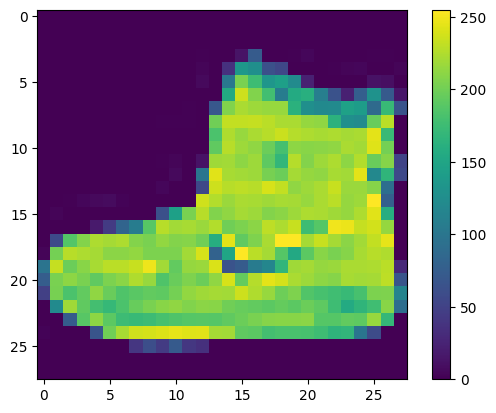

In [ ]:
#plot first image of the train data
#images that have been loaded are in the form of array of numbers(pixel values)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()#represent the pixel range : 0-255
plt.grid(False)
plt.show()

every images is an array of pixel values ranging from 0-255

I need to normalize the pixel values 0 - 1

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

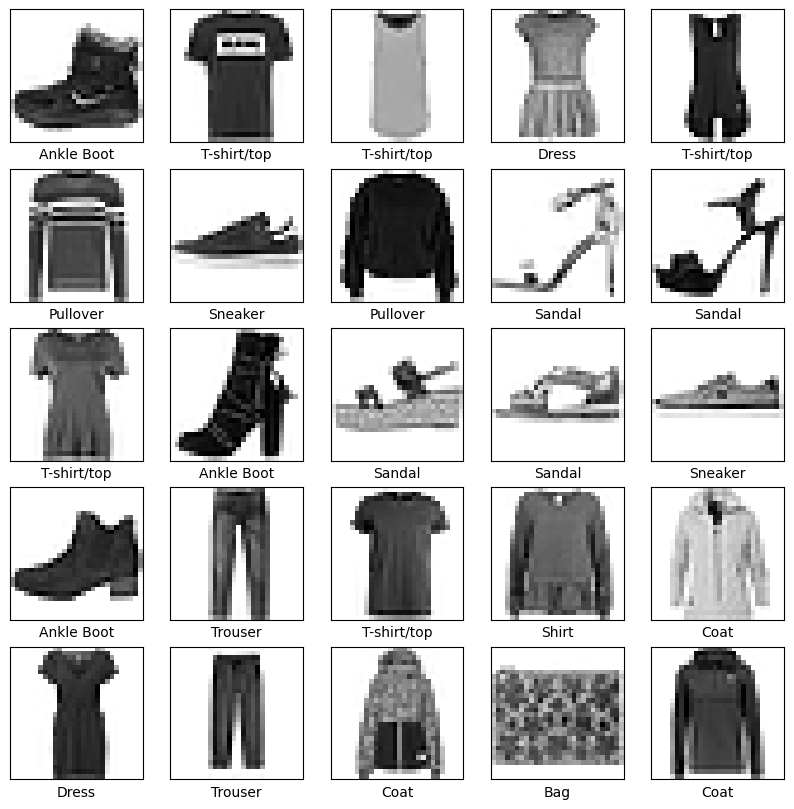

In [ ]:
#first 25 training images

plt.figure(figsize = (10,10))

for i in range(25):#0-24
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the neural network model**

Architecture made up of layers: input, hidden and output layer

tf.keras.layers.Dense

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a
#flatten: converting an aray into single dimension

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a.flatten()

array([1, 2, 3, 4, 5, 6])

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#input layer
    tf.keras.layers.Dense(128, activation='relu'),#hidden layer with 128 nodes
    tf.keras.layers.Dense(10),#output layer with 10 nodes #predictions generated by output layer in form of array of number
    tf.keras.layers.Softmax()
    ])

In [ ]:
model.summary()

images are in two dimension:height and width; 28 x 28 px

transform the images into one dimension: single row array: 28 x 28 = 784 px

For crossentropy loss computations the predictions generated by the output layer needs to be in the form of array of probabilities.

crossentropy loss = actual p -

from_logits = true, makes sure that the conversion happens at the backend

Reason behind softmax:

1. to convert the prediction of array of numbers into array of probablities

2. crossentropy; loss metric ; actual prob. dist and predicted prob.

Compile the Model: Tuning the model

1. loss function: how accurate the model is during the training. Minimize the loss

2. Opimization algos: Optimizer; help the neural network in changing weights; direction of change and magnitude of change

3. Final metric: used to monitor the train but test data; accuracy; classification problems; no. of labels corectly predicted


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Train the model:

1. Feed the training data to the model; train_images, train_labels

2. The model will learn to associate images and labels

3. You will ask the model to make predictions on test data ; test_images

4. Verify the predictions by comparing them with pre-exiting test labels

In [ ]:
#feed the model with data : fit method

model.fit(train_images, train_labels, epochs=10)
#images are feeded in batches of 32 by default: 60000/32 = 1875

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4994 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3386 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.241

In [ ]:
#evlaute the accuracy on test data

test_loss, test_acc =model.evaluate(test_images, test_labels)

print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8897
0.8896999955177307


In [ ]:
print(test_loss)

if train accuracy >>> test accuracy, Overfitting

Low Bias and High Variance

In [ ]:
#make predictions

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#print the prediction of the first image of the test
predictions[0]

array([ -6.2474575 , -17.774464  , -13.709358  , -13.639822  ,
       -13.77252   ,  -2.3699205 ,  -9.152112  ,   0.45613748,
       -12.146989  ,   5.206707  ], dtype=float32)

In [ ]:
#print the prediction of the first image of the test
predictions[0]

array([5.6957279e-09, 6.8718685e-12, 1.6992500e-08, 4.4981367e-12,
       2.8299075e-07, 2.1559918e-04, 2.3225729e-08, 5.7153009e-02,
       1.6990077e-07, 9.4263089e-01], dtype=float32)

In [ ]:
#extract the index postion of the label

np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
#generate predictions as array of probs

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
newpredictions = probability_model.predict(test_images)

In [ ]:
newpredictions[0]

In [ ]:
np.argmax(newpredictions[0])

In [ ]:
test_labels[0]